# Análisis Exploratorio de Datos (EDA) del Dataset Iris

Este notebook está diseñado como guía a través de un análisis exploratorio de datos completo utilizando el dataset **"Iris"**. Realizaremos un análisis detallado desde la comprensión inicial de los datos hasta la extracción de insights y generación de hipótesis. Utilizaremos bibliotecas populares como **Pandas**, **NumPy**, **Matplotlib**, **Seaborn** y **Scikit-learn**.


## **Índice**

1. [Configuración del Entorno](#1)
2. [EDA Level 0 — Comprensión de los Datos Originales](#2)
   - 2.1 [Carga de Datos](#2.1)
   - 2.2 [Inspección Inicial](#2.2)
   - 2.3 [Visualizaciones Básicas](#2.3)
3. [EDA Level 1 — Transformación de los Datos Originales](#3)
   - 3.1 [Limpieza de Datos](#3.1)
   - 3.2 [Manejo de Valores Atípicos (Outliers)](#3.2)
   - 3.3 [Transformaciones y Normalización](#3.3)
   - 3.4 [Ingeniería de Características](#3.4)
4. [EDA Level 2 — Comprensión de los Datos Transformados](#4)
   - 4.1 [Análisis Estadístico Descriptivo](#4.1)
   - 4.2 [Análisis Bivariado y Multivariado](#4.2)
   - 4.3 [Visualizaciones Avanzadas](#4.3)
5. [EDA Level 3 — Selección de Características y Reducción de Dimensionalidad](#5)
   - 5.1 [Selección de Características](#5.1)
   - 5.2 [Análisis de Componentes Principales (PCA)](#5.2)
6. [EDA Level 4 — Insights y Generación de Hipótesis](#6)
   - 6.1 [Identificación de Patrones Clave](#6.1)
   - 6.2 [Generación de Hipótesis](#6.2)
7. [Conclusiones](#7)

<a id="1"></a>
## 1. Configuración del Entorno

1. **Importar bibliotecas básicas**:
   - ***numpy*** y ***pandas*** son bibliotecas fundamentales para la manipulación y análisis de datos en Python.
   - ***sys*** y ***os*** se utilizan para manipular rutas del sistema y agregar directorios al sys.path, permitiendo la importación de módulos desde ubicaciones específicas.

2. **Importar funciones personalizadas**:
   - Se agrega un directorio al ***sys.path*** para permitir la importación de funciones desde un archivo específico (***data_summary.py***) ubicado en un directorio superior (***../utils***).
   - Se importan las funciones ***column_summary*** y ***column_summary_plus*** desde el módulo eda.

3. **Para visualización**:
   - ***matplotlib.pyplot*** y ***seaborn*** son bibliotecas utilizadas para la visualización de datos.
   - ***%matplotlib*** inline es un comando mágico de Jupyter que permite que las gráficas se muestren directamente en el notebook.

4. **Configuraciones adicionales**:
   - Se establece el estilo de las gráficas de ***matplotlib*** a ***ggplot***.
   - Se configura ***seaborn*** para usar un tema de cuadrícula blanca.

5. **Ignorar advertencias**:
    - Se importa el módulo ***warnings*** y se configuran para ignorar todas las advertencias, lo que puede ser útil para evitar mensajes de advertencia innecesarios durante el análisis.

In [23]:
# Comandos de instalación sugeridos
!pip install --upgrade pip
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [24]:
# Importar bibliotecas básicas
import numpy as np
import pandas as pd
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Para visualización
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set_theme(style='whitegrid')

<a id="2"></a>
## 2. EDA Level 0 — Comprensión de los Datos Originales

<a id="2.1"></a>
### 2.1 Carga de Datos

In [25]:
# Cargar los datos del archivo iris.csv
df = pd.read_csv('dataset/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<a id="2.2"></a>
### 2.2 Inspección Inicial

In [26]:
# Inspección inicial de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [27]:
# Descripción estadística de los datos
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


<a id="2.3"></a>
### 2.3 Visualizaciones Básicas

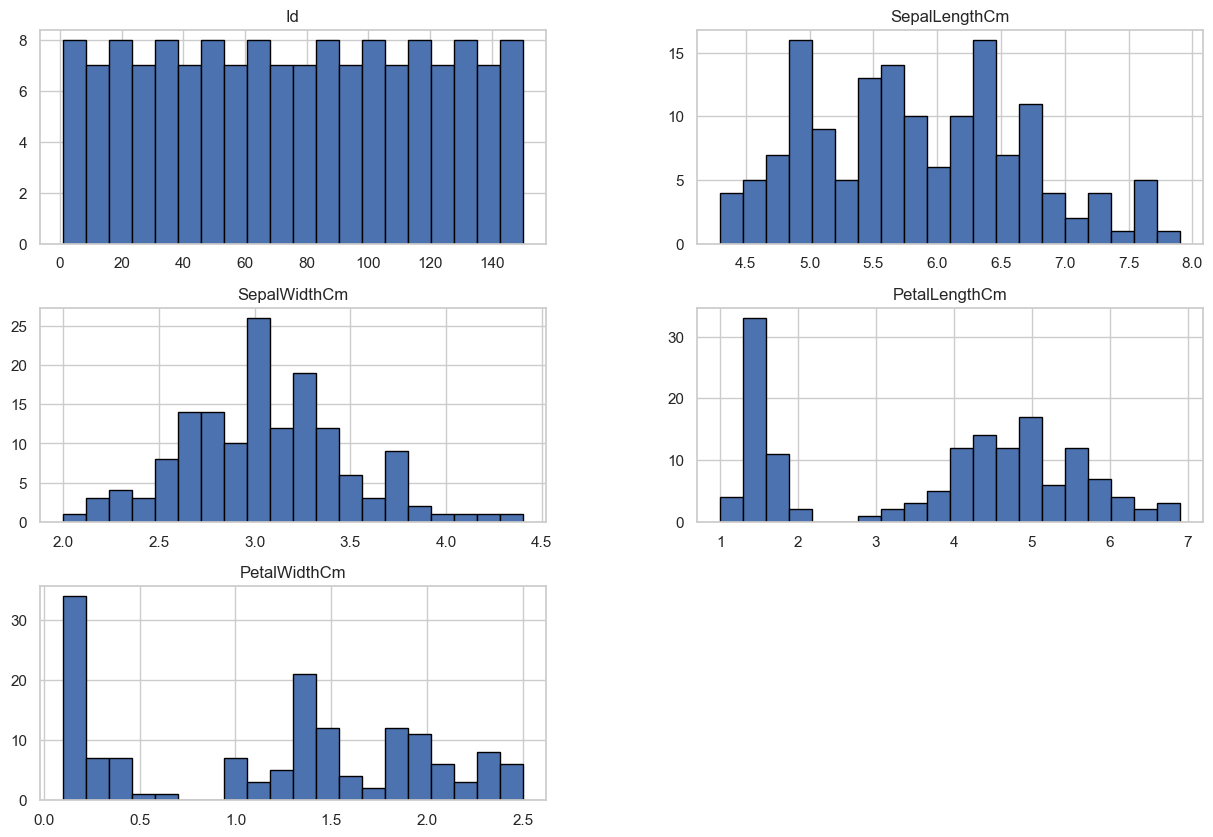

In [28]:
# Histograma de cada característica numérica
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.show()

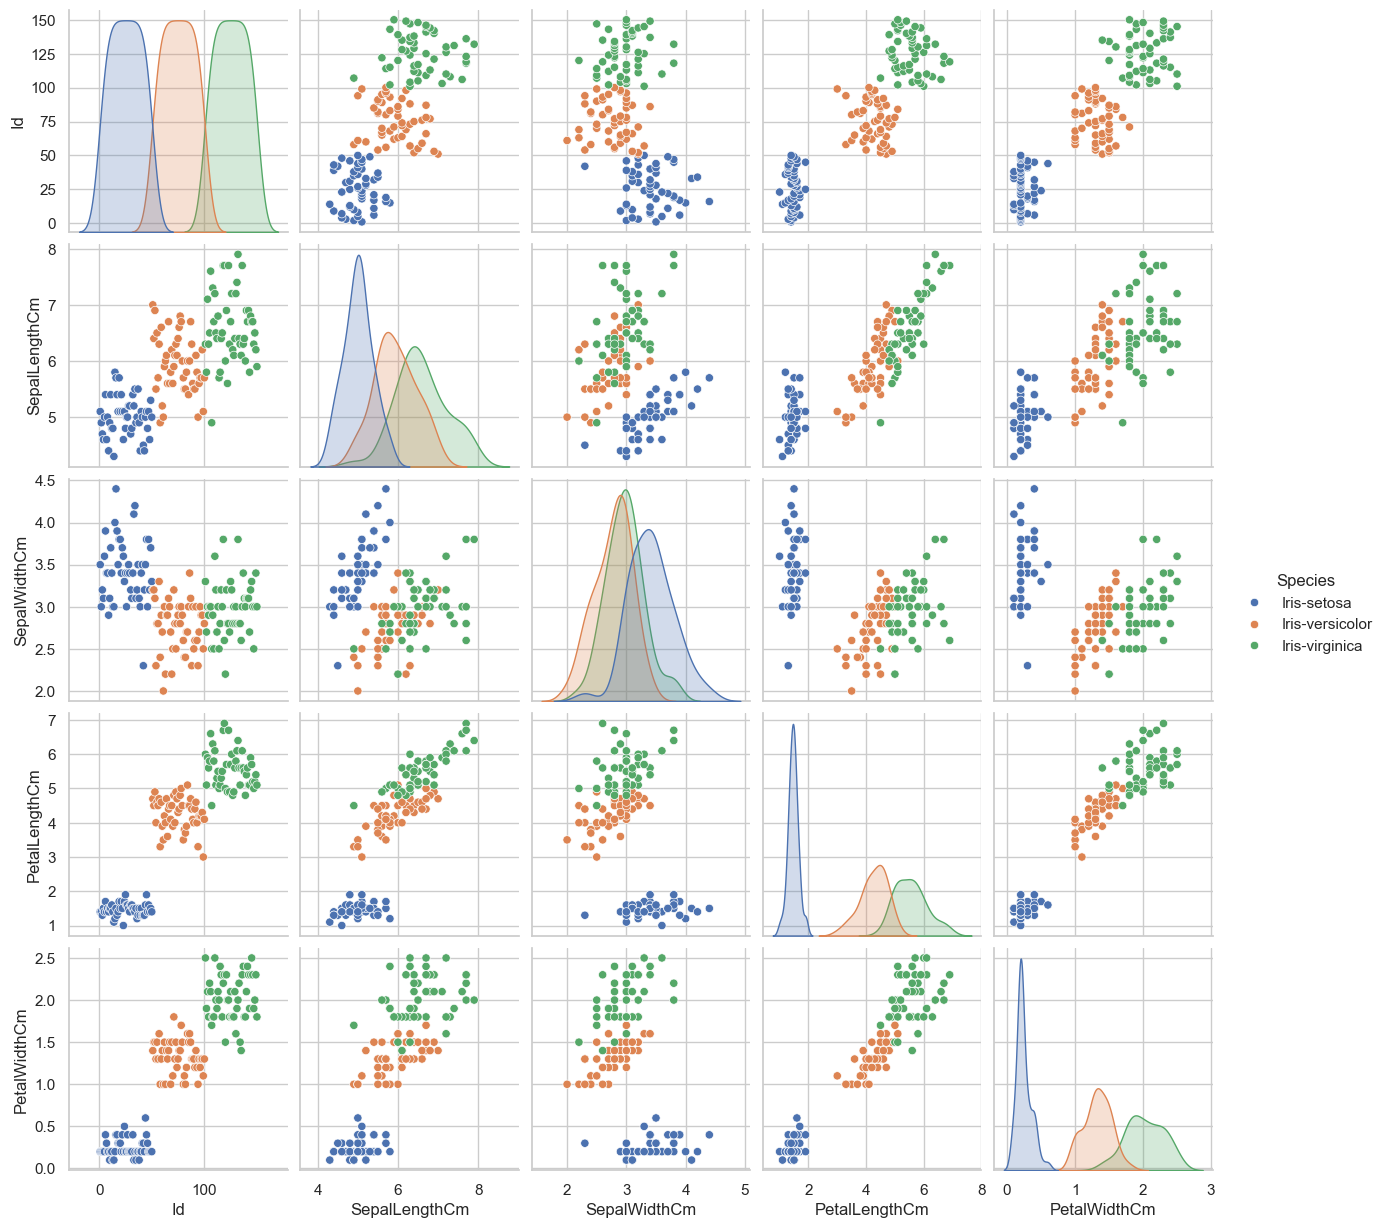

In [29]:
# Pairplot para visualizar las relaciones entre características
sns.pairplot(df, hue='Species')
plt.show()

<a id="3"></a>
## 3. EDA Level 1 — Transformación de los Datos Originales

<a id="3.1"></a>
### 3.1 Limpieza de Datos

In [30]:
# Verificar valores nulos
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<a id="3.2"></a>
### 3.2 Manejo de Valores Atípicos (Outliers)

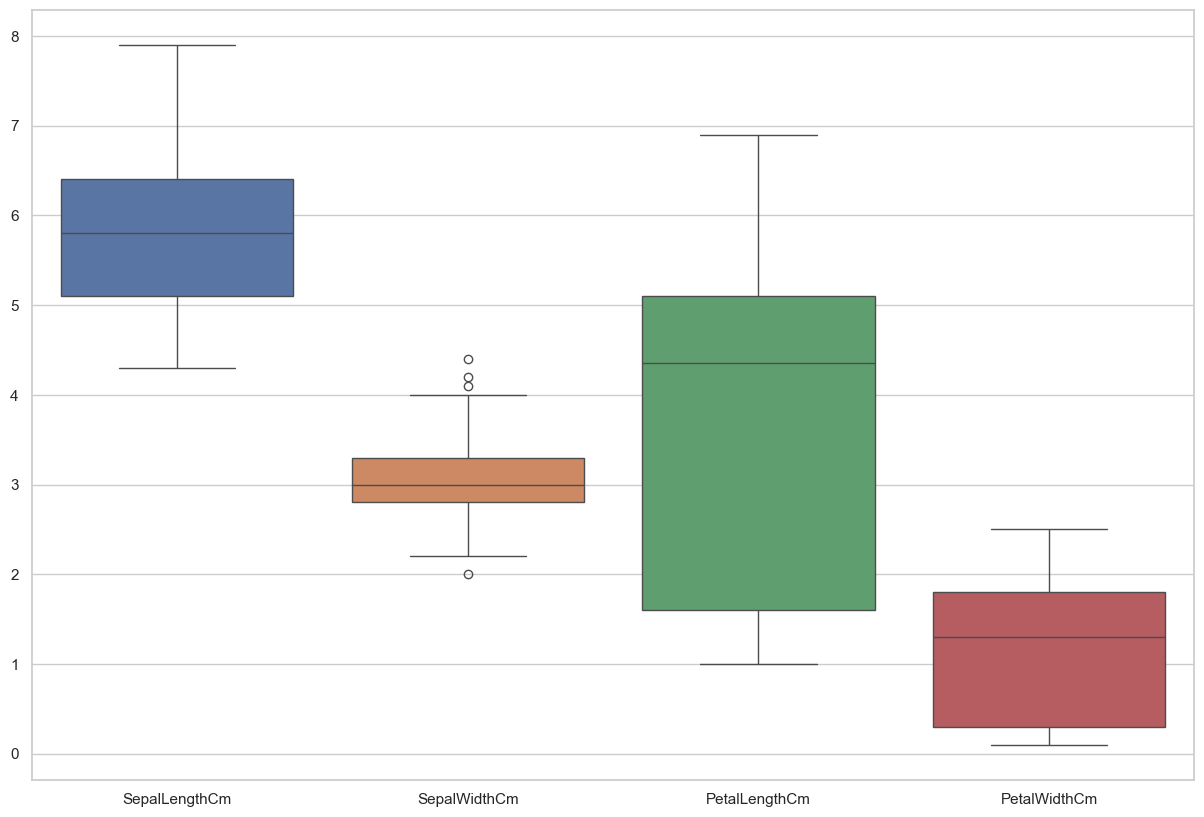

In [31]:
# Boxplot para identificar valores atípicos
plt.figure(figsize=(15, 10))
sns.boxplot(data=df.drop(columns=['Id']))
plt.show()

<a id="3.3"></a>
### 3.3 Transformaciones y Normalización

In [32]:
# Normalización de características numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.columns[1:5]] = scaler.fit_transform(df[df.columns[1:5]])
df_scaled.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,-0.900681,1.032057,-1.341272,-1.312977,Iris-setosa
1,2,-1.143017,-0.124958,-1.341272,-1.312977,Iris-setosa
2,3,-1.385353,0.337848,-1.398138,-1.312977,Iris-setosa
3,4,-1.506521,0.106445,-1.284407,-1.312977,Iris-setosa
4,5,-1.021849,1.263460,-1.341272,-1.312977,Iris-setosa


<a id="3.4"></a>
### 3.4 Ingeniería de Características

In [33]:
# Crear nuevas características si es necesario
# En este caso, no se crearán nuevas características
pass

<a id="4"></a>
## 4. EDA Level 2 — Comprensión de los Datos Transformados

<a id="4.1"></a>
### 4.1 Análisis Estadístico Descriptivo

In [34]:
# Descripción estadística de los datos transformados
df_scaled.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,75.500000,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,43.445368,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,1.000000,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,38.250000,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,75.500000,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,112.750000,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,150.000000,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


<a id="4.2"></a>
### 4.2 Análisis Bivariado y Multivariado

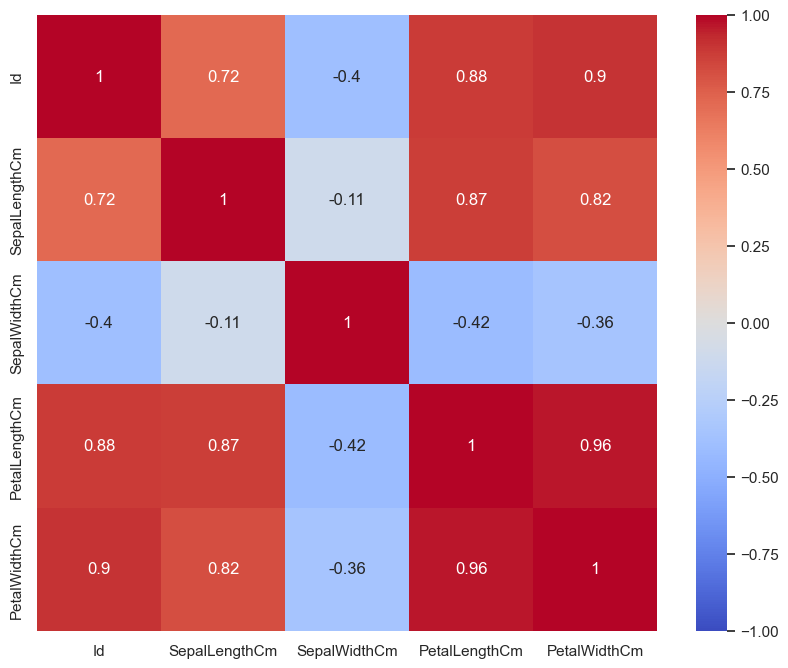

In [35]:
# Correlación entre características
plt.figure(figsize=(10, 8))
df = df_scaled.copy()
df.drop(columns=['Species'],inplace=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

<a id="4.3"></a>
### 4.3 Visualizaciones Avanzadas

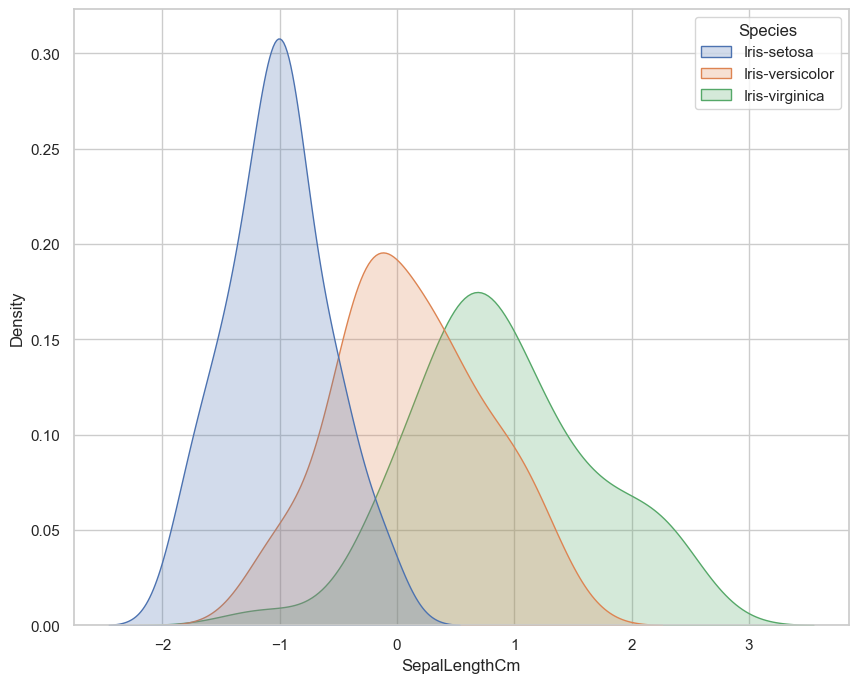

In [36]:
# Visualización avanzada: KDE plot
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df_scaled, x='SepalLengthCm', hue='Species', fill=True)
plt.show()

<a id="5"></a>
## 5. EDA Level 3 — Selección de Características y Reducción de Dimensionalidad

<a id="5.1"></a>
### 5.1 Selección de Características

In [37]:
# Selección de características utilizando SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

X = df_scaled.drop(columns=['Id', 'Species'])
y = df_scaled['Species']

selector = SelectKBest(score_func=f_classif, k=2)
X_new = selector.fit_transform(X, y)
X_new

array([[-1.34127240e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.39813811e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.17067529e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.44444970e+00],
       [-1.28440670e+00, -1.31297673e+00],
       [-1.22754100e+00, -1.31297673e+00],
       [-1.34127240e+00, -1.44444970e+00],
       [-1.51186952e+00, -1.44444970e+00],
       [-1.45500381e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.39813811e+00, -1.05003079e+00],
       [-1.34127240e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.18150376e+00],
       [-1.28440670e+00, -1.18150376e+00],
       [-1.17067529e+00, -1.31297673e+00],
       [-1.28440670e+00, -1.05003079e+00],
       [-1.56873522e+00, -1.31297673e+00],
       [-1.

<a id="5.2"></a>
### 5.2 Análisis de Componentes Principales (PCA)

In [38]:
# Reducción de dimensionalidad utilizando PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
df_pca['Species'] = y.values
df_pca.head()

,PC1,PC2,Species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


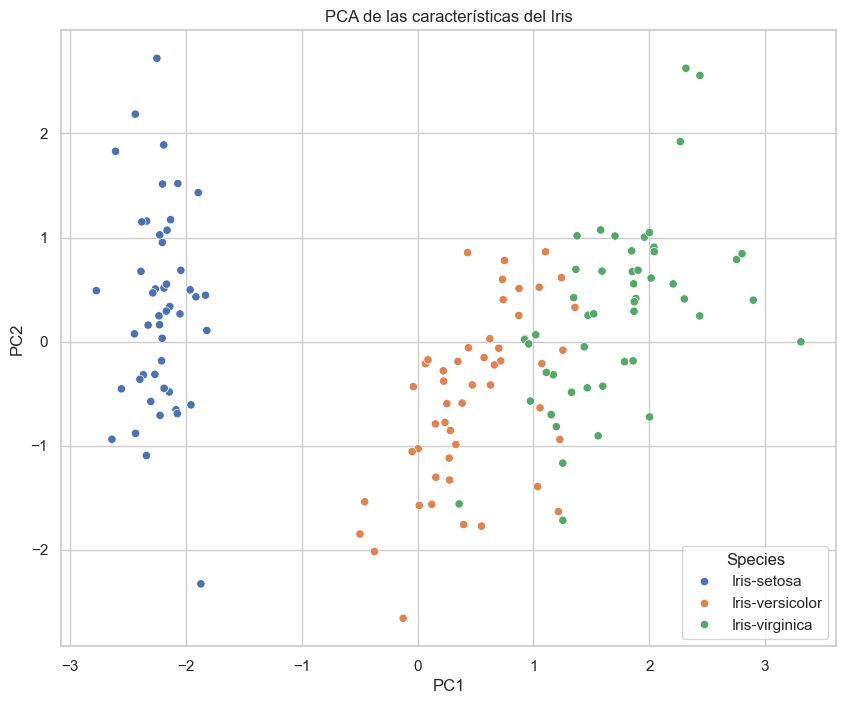

In [39]:
# Visualización de los componentes principales
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Species')
plt.title('PCA de las características del Iris')
plt.show()

<a id="6"></a>
## 6. EDA Level 4 — Insights y Generación de Hipótesis

<a id="6.1"></a>
### 6.1 Identificación de Patrones Clave

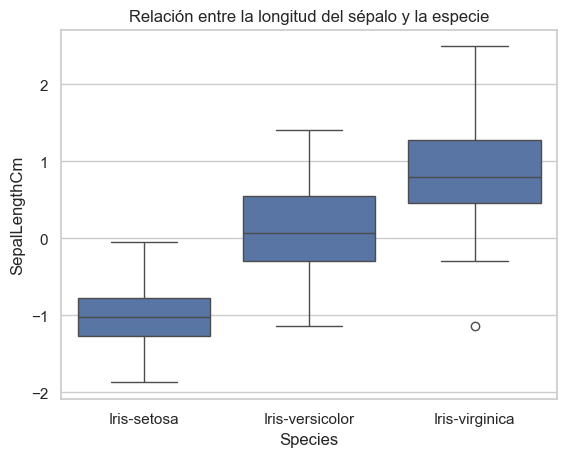

In [41]:
# Identificación de patrones clave
# Ejemplo: Relación entre la longitud del sépalo y la especie
sns.boxplot(data=df_scaled, x='Species', y='SepalLengthCm')
plt.title('Relación entre la longitud del sépalo y la especie')
plt.show()

<a id="6.2"></a>
### 6.2 Generación de Hipótesis

- Hipótesis 1: La longitud del sépalo es un buen predictor de la especie de Iris.
- Hipótesis 2: La combinación de la longitud y el ancho del pétalo puede mejorar la precisión de la clasificación de especies.

<a id="7"></a>
## 7. Conclusiones

En este análisis exploratorio de datos, hemos realizado una inspección inicial de los datos, visualizaciones básicas y avanzadas, transformaciones y normalización de datos, y reducción de dimensionalidad utilizando PCA. También hemos identificado patrones clave y generado hipótesis para futuros análisis.